# Linear Regression and Gradient Descent

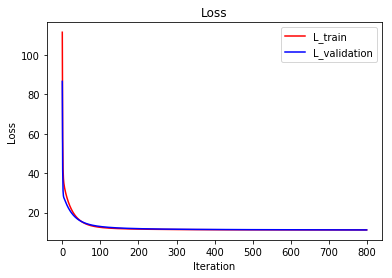

In [3]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#compute the cost
def compute_cost(x,y,theta):
    m = shape(x)[0]
    pred = dot(x,theta)
    cost = dot((pred-y).T,(pred-y))/(2*m)
    return cost
#training process
def gradient_descent(x_train,y_train,x_validation,y_validation,initial_theta,learning_rate,num_iterations):
    index_y_train = zeros(num_iterations)
    index_y_validation = zeros(num_iterations)
    m = shape(x_train)[0]
    theta = initial_theta
    for i in range(num_iterations):
        #calculate the gradient
        pred = dot(x_train,theta)
        theta_gradient = dot(x_train.transpose(),(pred-y_train))/m
        theta = theta - learning_rate*theta_gradient
        index_y_train[i] = compute_cost(x_train,y_train,theta)
        index_y_validation[i] = compute_cost(x_validation,y_validation,theta)
    #draw
    plot1,  = plt.plot(np.arange(0, num_iterations), index_y_train, 'r', label='L_train')
    plot2,  = plt.plot(np.arange(0, num_iterations), index_y_validation, 'b', label='L_validation')
    plt.title('Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend([plot1, plot2], ['L_train', 'L_validation'])
    plt.show()
    return theta
#load data
def main():
    n = 13
    m = 506
    learning_rate = 0.1
    num_iterations = 800
    initial_theta = zeros(shape = (n+1,1))
    x, y = load_svmlight_file("housing_scale.txt")
    x = x.toarray()
    x = x.reshape((m,n))
    y = y.reshape((m,1))
    x = append(ones([m,1]),x,1)
    x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, random_state=42)
    theta = gradient_descent(x_train,y_train,x_validation,y_validation,initial_theta,learning_rate,num_iterations)
# Execute main() only when this script is executed from the command line
if __name__ == "__main__":
    main()